In [63]:
# Autoregressive means self-regressive, which means it's gonna get it's data from its predictions for training.

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd

In [64]:
np.random.rand(200)*0.1

array([0.09256949, 0.08894685, 0.01890527, 0.01057981, 0.02748136,
       0.02146652, 0.03863654, 0.08299865, 0.09868169, 0.05163407,
       0.02878179, 0.09241957, 0.09408328, 0.04474934, 0.08855285,
       0.00163825, 0.06758088, 0.07165648, 0.05523952, 0.0863225 ,
       0.00818413, 0.06400461, 0.03148017, 0.0688733 , 0.02394875,
       0.08540056, 0.00199557, 0.08329138, 0.09300692, 0.06927565,
       0.0416205 , 0.08868347, 0.06566963, 0.0913969 , 0.09065634,
       0.09866569, 0.06325896, 0.03665236, 0.01165016, 0.05745665,
       0.04796996, 0.00344902, 0.03569324, 0.06264288, 0.03502932,
       0.02292862, 0.09371629, 0.06002732, 0.08038666, 0.0018244 ,
       0.08547807, 0.03942109, 0.02361569, 0.02064895, 0.0943947 ,
       0.03676884, 0.03789105, 0.04786971, 0.00258167, 0.01325729,
       0.08956036, 0.08951416, 0.02361204, 0.06496332, 0.05017803,
       0.08148682, 0.06935882, 0.08324896, 0.04008912, 0.03108267,
       0.00422824, 0.07949236, 0.09283558, 0.08869335, 0.05492

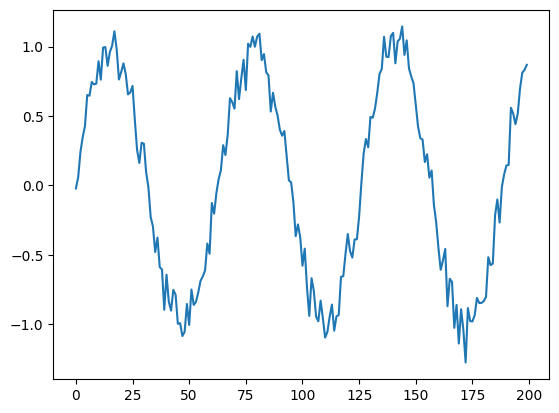

In [65]:
# Make the original data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200)*0.1

# plotting the data the data
plt.plot(series)
plt.show()

In [66]:
T = 10
X = []
Y = []

for i in range(len(series) - T):  # Since we'll check the each 10 partial 
  x = series[i:i+T]  # [0,10) 
  X.append(x)
  y = series[i+T]    # So for [0,1,2,3,4,5,6,7,8,9] ==> [10] and so on
  Y.append(y)

print(f"Length of  X (which is a list) : {len(X)}")

X = np.array(X).reshape(-1,T) # We create a 1 dim vector and turn it into 1,1 array
print(f"X Shape: {X.shape}")
Y = np.array(Y)
print(f"Y Shape: {Y.shape}") # it stays as 1d vector

Length of  X (which is a list) : 190
X Shape: (190, 10)
Y Shape: (190,)


In [73]:
# Auto Regressive Linear Model

i = Input(shape = (T,))
x = Dense(512)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss="mse",
    optimizer=Adam(lr=0.1),
)

N = len(X)

# Train the RNN
r = model.fit(X[:-N//2],Y[:-N//2],
          validation_data=(X[-N//2:],Y[-N//2:]),
          epochs=80)

Epoch 1/80
3/3 [==============================] - 1s 151ms/step - loss: 0.4010 - val_loss: 0.1601
Epoch 2/80
3/3 [==============================] - 0s 70ms/step - loss: 0.1657 - val_loss: 0.2029
Epoch 3/80
3/3 [==============================] - 0s 59ms/step - loss: 0.1675 - val_loss: 0.1264
Epoch 4/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0740 - val_loss: 0.0592
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0487 - val_loss: 0.0540
Epoch 6/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0532 - val_loss: 0.0347
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0287 - val_loss: 0.0202
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0169 - val_loss: 0.0299
Epoch 9/80
3/3 [==============================] - 0s 18ms/step - loss: 0.0242 - val_loss: 0.0245
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0186 - val_loss: 0.0202
Epoch 11/80
3/3 [===========

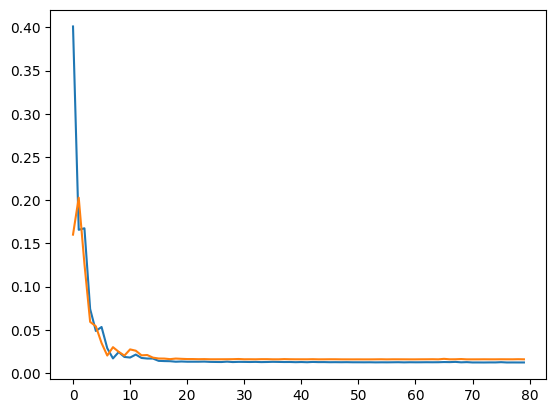

In [74]:
plt.plot(r.history["loss"])
plt.plot(r.history["val_loss"])

In [75]:
# FORECASTING FUTURE VALUES (USING ONLY SELF-PREDICTIONS FOR MAKING FUTURE PREDICTIONS)
validation_target = Y[-N//2:]
validation_predictions = []

last_train_input = X[-N//2]

print("Last_train shape : " + str(last_train_input))

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_train_input.reshape(1,-1))[0, 0]  # Our X data which's consisted from groups each contains 10 elements.Each of those groups are vectors.So we have to turn them into (1 x 1) shaped matrix
  validation_predictions.append(p)

  last_train_input = np.roll(last_train_input, -1) # brings first index to the last index,which is the oldest index
  last_train_input[-1] = p                         # chagnes the last index with the predicted one

Last_train shape : [ 0.02198405 -0.12186888 -0.36465633 -0.28045294 -0.3719545  -0.57769
 -0.45484935 -0.73741446 -0.93894097 -0.66756876]
1/1 [==============================] - 0s 20ms/step


In [76]:
print(len(validation_predictions))
print( X[-N//2])

95
[ 0.02198405 -0.12186888 -0.36465633 -0.28045294 -0.3719545  -0.57769
 -0.45484935 -0.73741446 -0.93894097 -0.66756876]


In [77]:
a = np.array([1,2,3])
b = np.roll(a,1)   # brings last index to the first index
c = np.roll(a,-1)  # brings first index to the last index
print(b)
print(c)

[3 1 2]
[2 3 1]


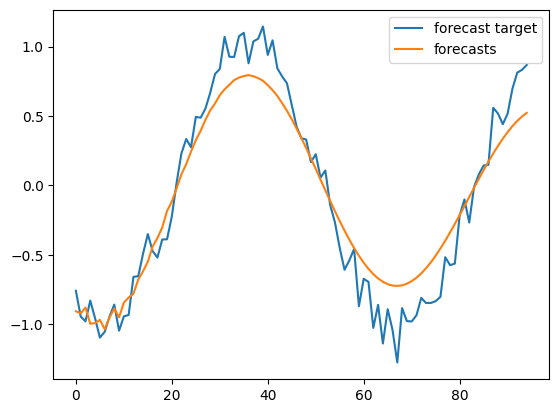

In [78]:
plt.plot(validation_target,label="forecast target")
plt.plot(validation_predictions,label="forecasts")
plt.legend()
plt.show()